<a href="https://colab.research.google.com/github/VinoJose/Deep-learning-with-Python/blob/master/LinearClassifierInPureTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=num_samples_per_class)

In [0]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [0]:
targets = np.vstack(
    (
        np.zeros((num_samples_per_class,1), dtype='float32'),
        np.ones((num_samples_per_class,1), dtype='float32')
     )
)

In [0]:
inputs, targets

(array([[ 1.4957976 ,  4.07487   ],
        [ 1.4840921 ,  4.7874722 ],
        [ 0.48978886,  3.4565887 ],
        ...,
        [ 3.2670102 ,  1.0702487 ],
        [ 3.0604966 , -0.8752539 ],
        [ 1.4267573 , -1.6154282 ]], dtype=float32), array([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]], dtype=float32))

In [0]:
negative_samples.shape, inputs.shape

((1000, 2), (2000, 2))

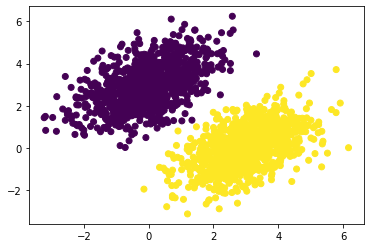

In [0]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])

In [0]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b= tf.Variable(initial_value=tf.random.uniform(shape=(output_dim,)))

In [0]:
def model(inputs):
  return tf.matmul(inputs,W) + b


In [0]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets-predictions)
  return tf.reduce_mean(per_sample_losses)

In [0]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets,predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [0]:
for step in range(20):
  loss = training_step(inputs, targets)
  print ('Loss at step %d: %.4f' % (step, loss))


Loss at step 0: 3.7203
Loss at step 1: 0.5092
Loss at step 2: 0.1378
Loss at step 3: 0.0888
Loss at step 4: 0.0786
Loss at step 5: 0.0733
Loss at step 6: 0.0690
Loss at step 7: 0.0651
Loss at step 8: 0.0616
Loss at step 9: 0.0583
Loss at step 10: 0.0554
Loss at step 11: 0.0527
Loss at step 12: 0.0502
Loss at step 13: 0.0480
Loss at step 14: 0.0459
Loss at step 15: 0.0440
Loss at step 16: 0.0423
Loss at step 17: 0.0408
Loss at step 18: 0.0393
Loss at step 19: 0.0380


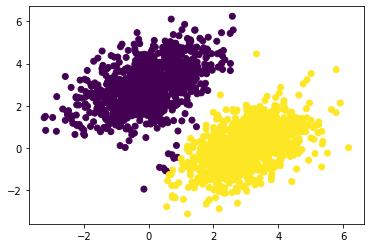

In [0]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

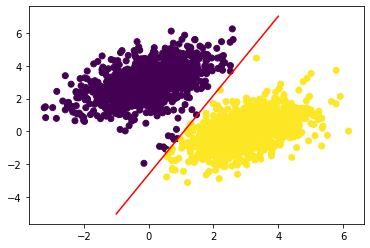

In [0]:
x = np.linspace(-1,4,100)
#x*w1 + y*w2 + b = 0.5
y = -x* W[0]/W[1] - b/W[1] + 0.5/W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:,1], c=predictions[:,0] > 0.5)